<a href="https://colab.research.google.com/github/BigS3xy/Shaul-Projects/blob/main/LBJ_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nba_api #התקנת הספרייה הנדרשת

  Using cached nba_api-1.10.0-py3-none-any.whl.metadata (5.8 kB)
Using cached nba_api-1.10.0-py3-none-any.whl (285 kB)


In [ ]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import pandas as pd
import time
#יבוא הספריות הרלוונטיות


In [ ]:
lebron = [p for p in players.get_players() if p['full_name'] == 'LeBron James'][0]
player_id = lebron['id'] #חיפוש של לברון

In [ ]:
seasons = [f"{year}-{str(year+1)[-2:]}" for year in range(2003, 2025)] #השנים הרצויות

In [ ]:
all_games = []

# לולאה על כל העונות וכל סוגי העונה (רגיל + פלייאוף)
for season in seasons:
    for season_type in ['Regular Season', 'Playoffs']:
        try:
            gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)
            df = gamelog.get_data_frames()[0]
            if not df.empty:
                df['SEASON'] = season
                df['SEASON_TYPE'] = season_type
                all_games.append(df)
            time.sleep(1.1)  # הגבלת API
        except Exception as e:
            print(f"season error{season}, {season_type}: {e}")
            continue

# איחוד כל המשחקים
df_all = pd.concat(all_games, ignore_index=True)

In [ ]:

# בחירת עמודות רלוונטיות
df_filtered = df_all[['SEASON', 'SEASON_TYPE', 'GAME_DATE', 'MATCHUP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK']]
df_filtered['GAME_DATE'] = pd.to_datetime(df_filtered['GAME_DATE'])
df_filtered = df_filtered.sort_values(by='GAME_DATE')

/tmp/ipython-input-8-192995773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['GAME_DATE'] = pd.to_datetime(df_filtered['GAME_DATE'])


In [ ]:
# שמירה לקובץ JSON CSV
df_filtered.to_csv("lebron_all_games_full.csv", index=False)
df_all.to_json("lebron_all_games_api.json", orient='records', lines=True)

print("done")

done


In [ ]:
from google.colab import files
files.download('lebron_all_games_full.csv')
#נשמר בברירת מחדל של קולאב אז מיבא אותו
df = pd.read_csv('lebron_all_games_full.csv')
print(df.head(5)) #בדיקה שעבר

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

    SEASON     SEASON_TYPE   GAME_DATE      MATCHUP  MIN  PTS  REB  AST  STL  \
0  2003-04  Regular Season  2003-10-29    CLE @ SAC   42   25    6    9    4   
1  2003-04  Regular Season  2003-10-30    CLE @ PHX   41   21   12    8    1   
2  2003-04  Regular Season  2003-11-01    CLE @ POR   39    8    4    6    2   
3  2003-04  Regular Season  2003-11-05  CLE vs. DEN   41    7   11    7    2   
4  2003-04  Regular Season  2003-11-07    CLE @ IND   44   23    5    3    0   

   BLK  
0    0  
1    0  
2    0  
3    3  
4    0  


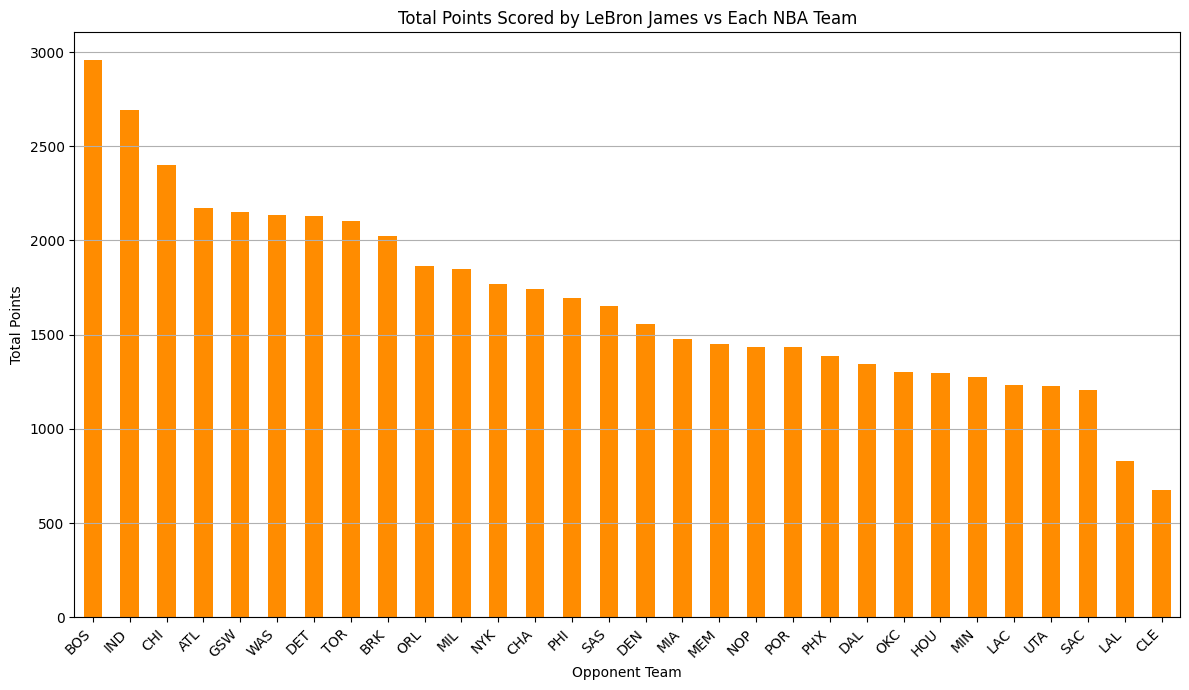

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

#יבוא הספריות הרלוונטיות להמשך העבודה

# חילוץ שם קבוצה יריבה
df['OPPONENT'] = df['MATCHUP'].str.extract(r'([A-Z]{3})$')

# תיקון שמות ישנים
team_fix = {
    'NOH': 'NOP',
    'NOK': 'NOP',
    'SEA': 'OKC',
    'NJN': 'BRK',
    'BKN': 'BRK',
    'GOS': 'GSW',
    'PHO': 'PHX'
}
df['OPPONENT'] = df['OPPONENT'].replace(team_fix)

#  סכום נקודות לפי קבוצה
points_by_team = df.groupby('OPPONENT')['PTS'].sum().sort_values(ascending=False)
top_30 = points_by_team.head(30)

#  גרף
plt.figure(figsize=(12, 7))
top_30.plot(kind='bar', color='darkorange')
plt.title("Total Points Scored by LeBron James vs Each NBA Team")
plt.xlabel("Opponent Team")
plt.ylabel("Total Points")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# ממוצעים כוללים
career_avg = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'MIN']].mean().round(1)

# סה"כ כוללים
career_total = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'MIN']].sum()

#שיאים
career_max = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'MIN']].max()
print(career_avg,career_total,career_max)

PTS    27.2
REB     7.7
AST     7.4
STL     1.5
BLK     0.8
MIN    38.4
dtype: float64 PTS    50473
REB    14359
AST    13679
STL     2838
BLK     1434
MIN    71121
dtype: int64 PTS    61
REB    20
AST    19
STL     7
BLK     5
MIN    55
dtype: int64


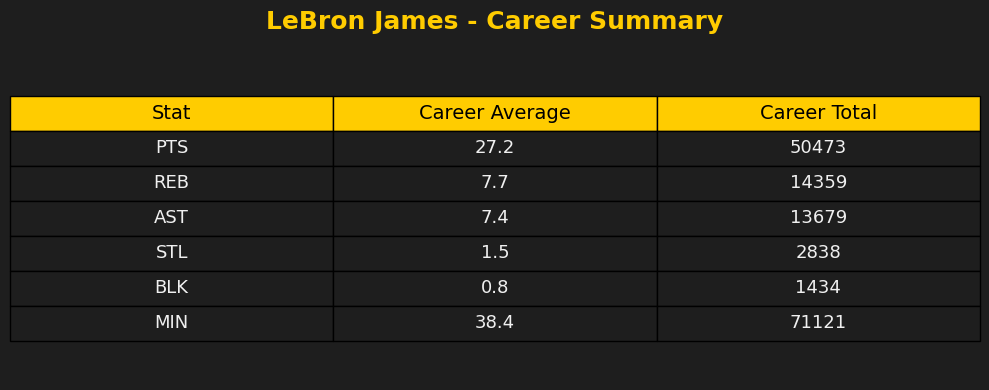

In [ ]:
# ממוצעים כוללים
career_avg = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'MIN']].mean().round(1)

# סה"כ כוללים
career_total = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'MIN']].sum().astype(int)

# יצירת טבלת נתונים
player_card = pd.DataFrame({
    'Stat': career_avg.index,
    'Career Average': career_avg.values,
    'Career Total': career_total.values
})

# צבעים ועיצוב
background_color = '#1e1e1e'
text_color = '#f0f0f0'
accent_color = '#ffcc00'

# יצירת פלטה מחדשר
fig, ax = plt.subplots(figsize=(10, 4))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# הסתרת הצירים
ax.axis('off')

# ציור טבלה צבעונית
table = plt.table(cellText=player_card.values,
                  colLabels=player_card.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=[accent_color]*3,
                  cellColours=[[background_color]*3]*len(player_card))

# עיצוב גופנים וצבעים
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1, 2)

# שינוי צבע טקסט של תאים
for i in range(len(player_card)):
    for j in range(3):
        table[(i+1, j)].get_text().set_color(text_color)

# שינוי צבע טקסט של כותרות
for j in range(3):
    table[(0, j)].get_text().set_color('black')
    table[(0, j)].set_fontsize(14)

# כותרת
plt.title("LeBron James - Career Summary", fontsize=18, color=accent_color, weight='bold', pad=20)

plt.tight_layout()
plt.show()

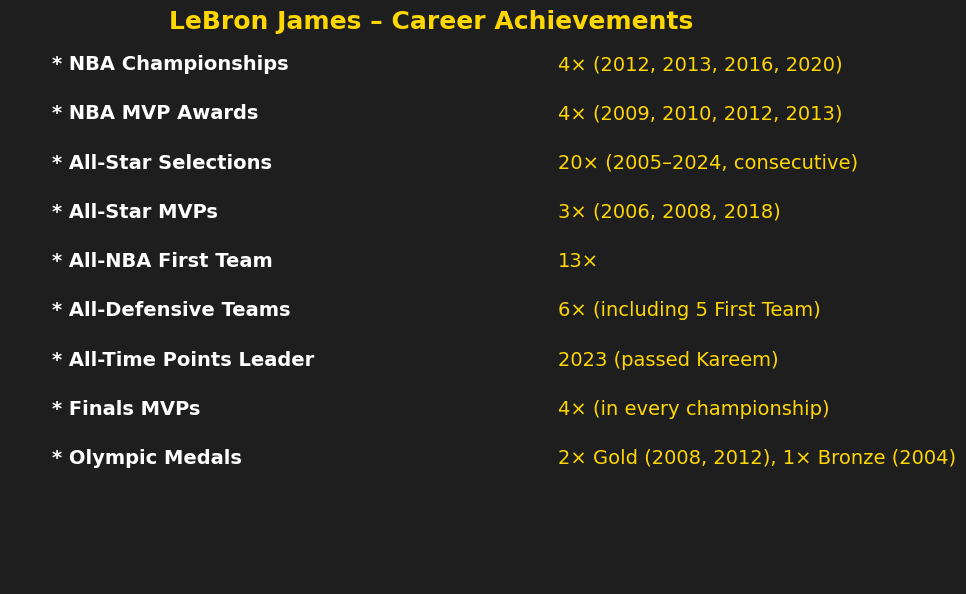

In [ ]:
#הצגת הישגיו
achievements_text = [
    ("* NBA Championships", "4× (2012, 2013, 2016, 2020)"),
    ("* NBA MVP Awards", "4× (2009, 2010, 2012, 2013)"),
    ("* All-Star Selections", "20× (2005–2024, consecutive)"),
    ("* All-Star MVPs", "3× (2006, 2008, 2018)"),
    ("* All-NBA First Team", "13×"),
    ("* All-Defensive Teams", "6× (including 5 First Team)"),
    ("* All-Time Points Leader", "2023 (passed Kareem)"),
    ("* Finals MVPs", "4× (in every championship)"),
    ("* Olympic Medals", "2× Gold (2008, 2012), 1× Bronze (2004)")
]

# יצירת טבלה
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#1e1e1e')
ax.set_facecolor('#1e1e1e')
ax.axis('off')

# גותרת
title = "LeBron James – Career Achievements"
ax.text(0.5, 1.05, title, color='#FFD700', fontsize=18, ha='center', va='top', fontweight='bold')

# הוספת שורות
for i, (label, value) in enumerate(achievements_text):
    y = 0.95 - i * 0.09
    ax.text(0.05, y, label, color='white', fontsize=14, va='center', fontweight='bold')
    ax.text(0.65, y, value, color='#FFD700', fontsize=14, va='center')

plt.tight_layout()
plt.show()

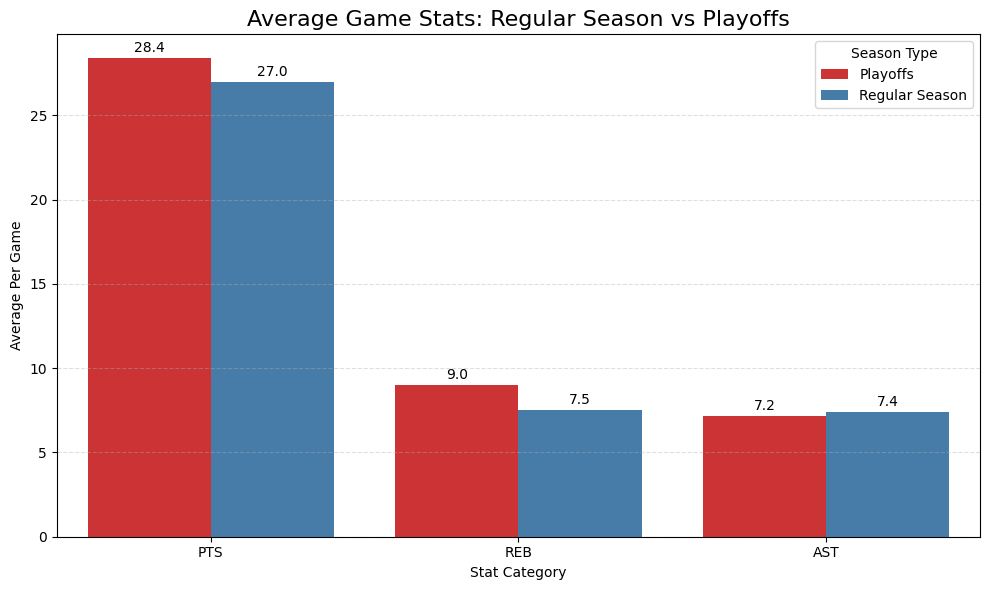

In [ ]:
# חישוב ממוצעים לפי סוג עונה
avg_stats = df.groupby('SEASON_TYPE')[['PTS', 'REB', 'AST']].mean().reset_index()

# המרה לפורמט ארוך
avg_stats_melted = avg_stats.melt(id_vars='SEASON_TYPE',value_vars=['PTS', 'REB', 'AST'],var_name='Stat', value_name='Average')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_stats_melted, x='Stat', y='Average', hue='SEASON_TYPE', palette='Set1')

# הוספת מספרים על העמודות
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=2, fontsize=10, color='black')

plt.title('Average Game Stats: Regular Season vs Playoffs', fontsize=16)
plt.xlabel('Stat Category')
plt.ylabel('Average Per Game')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Season Type')
plt.tight_layout()
plt.show()

In [ ]:
# נמצא את עונת הרוקי והעונה האחרונה
rookie_season = df['SEASON'].min()
latest_season = df['SEASON'].max()

# סינון לעונות הרצויות בלבד
rookie_vs_latest = df[df['SEASON'].isin([rookie_season, latest_season]) & (df['SEASON_TYPE'] == 'Regular Season')]

# ממוצעים לפי עונה
avg_by_season = rookie_vs_latest.groupby('SEASON')[['PTS', 'REB', 'AST']].mean().reset_index()
print(avg_by_season)


    SEASON        PTS       REB       AST
0  2003-04  20.936709  5.468354  5.886076
1  2024-25  24.428571  7.800000  8.214286


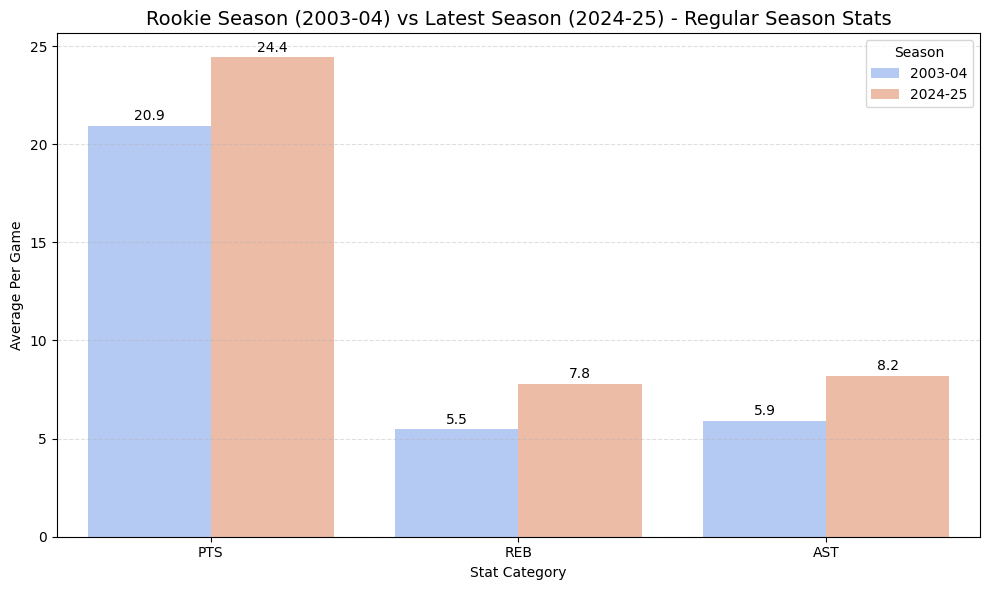

In [ ]:

# נמצא את עונת הרוקי והעונה האחרונה
rookie_season = df['SEASON'].min()
latest_season = df['SEASON'].max()

# סינון לעונות הרצויות בלבד
rookie_vs_latest = df[df['SEASON'].isin([rookie_season, latest_season]) & (df['SEASON_TYPE'] == 'Regular Season')]

# ממוצעים לפי עונה
avg_by_season = rookie_vs_latest.groupby('SEASON')[['PTS', 'REB', 'AST']].mean().reset_index()

# המרה  לצורך גרף
avg_by_season_melted = avg_by_season.melt(id_vars='SEASON',value_vars=['PTS', 'REB', 'AST'],var_name='Stat', value_name='Average')

# גרף
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_by_season_melted, x='Stat', y='Average', hue='SEASON', palette='coolwarm')

# הוספת מספרים
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=2, fontsize=10)

plt.title(f'Rookie Season ({rookie_season}) vs Latest Season ({latest_season}) - Regular Season Stats', fontsize=14)
plt.xlabel('Stat Category')
plt.ylabel('Average Per Game')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

In [ ]:
# חילוץ קוד קבוצה יריבה
df['OPPONENT'] = df['MATCHUP'].str.extract(r'([A-Z]{3})$')

# תיקון קודים ישנים
team_fix = {
    'NOH': 'NOP', 'NOK': 'NOP', 'SEA': 'OKC',
     'GOS': 'GSW', 'PHO': 'PHX'
}
df['OPPONENT'] = df['OPPONENT'].replace(team_fix)

# מיפוי קבוצות למדינות
team_to_state = {
    "ATL": "GA", "BOS": "MA", "BRK": "NJ", "CHA": "NC", "CHO": "NC", "CHI": "IL", "CLE": "OH",
    "DAL": "TX", "DEN": "CO", "DET": "MI", "GSW": "CA", "HOU": "TX", "IND": "IN", "LAC": "CA", "LAL": "CA",
    "MEM": "TN", "MIA": "FL", "MIL": "WI", "MIN": "MN", "NOP": "LA",
    "NYK": "NY", "OKC": "OK", "ORL": "FL", "PHI": "PA", "PHX": "AZ", "POR": "OR", "SAC": "CA",
    "SAS": "TX", "TOR": "ON", "UTA": "UT", "WAS": "DC"
}
df['STATE'] = df['OPPONENT'].map(team_to_state)

# הסרה זמנית של NJ כדי שנכניס אותה ידנית
df = df[df['STATE'] != 'NJ']

# סכימת נקודות לפי STATE
grouped = df.groupby('STATE')['PTS'].agg(['sum', 'count']).reset_index()
grouped.columns = ['STATE', 'Total_Points', 'Games']
grouped['Avg_Points'] = grouped['Total_Points'] / grouped['Games']

# הוספה ידנית של ניו ג'רזי (BRK + NJN)
grouped = pd.concat([grouped, pd.DataFrame({
    'STATE': ['NJ'],
    'Total_Points': [2023],
    'Games': [73],
    'Avg_Points': [2023 / 73]
})], ignore_index=True)

# ציור מפה
fig = px.choropleth(
    grouped,
    locations='STATE',
    locationmode="USA-states",
    color='Total_Points',
    hover_name='STATE',
    hover_data={'Total_Points': True, 'Avg_Points': ':.2f'},
    scope="usa",
    color_continuous_scale="Reds"
)

fig.show()

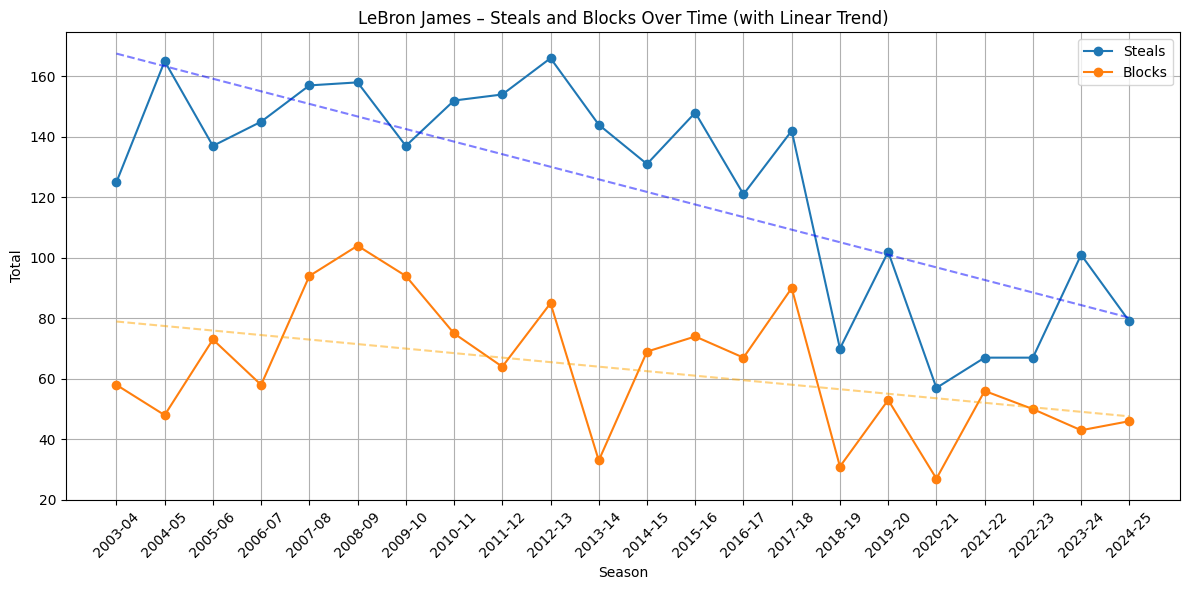

In [ ]:


seasonal_stats = df.groupby('SEASON')[['STL', 'BLK']].sum().reset_index()
season_nums = np.arange(len(seasonal_stats))

plt.figure(figsize=(12, 6))

# חטיפות
plt.plot(seasonal_stats['SEASON'], seasonal_stats['STL'], marker='o', label='Steals')
z1 = np.polyfit(season_nums, seasonal_stats['STL'], 1)
plt.plot(seasonal_stats['SEASON'], np.poly1d(z1)(season_nums), linestyle='--', color='blue', alpha=0.5)

# חסימות
plt.plot(seasonal_stats['SEASON'], seasonal_stats['BLK'], marker='o', label='Blocks')
z2 = np.polyfit(season_nums, seasonal_stats['BLK'], 1)
plt.plot(seasonal_stats['SEASON'], np.poly1d(z2)(season_nums), linestyle='--', color='orange', alpha=0.5)

# עיצוב
plt.title("LeBron James – Steals and Blocks Over Time (with Linear Trend)")
plt.xlabel("Season")
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
seasonal_stats = df.groupby('SEASON')[['STL', 'BLK']].sum().reset_index()
season_nums = np.arange(len(seasonal_stats))

print(seasonal_stats)

     SEASON  STL  BLK
0   2003-04  130   58
1   2004-05  177   52
2   2005-06  141   75
3   2006-07  159   65
4   2007-08  161   98
5   2008-09  160  105
6   2009-10  144   97
7   2010-11  159   75
8   2011-12  158   66
9   2012-13  170   85
10  2013-14  157   37
11  2014-15  142   70
12  2015-16  153   76
13  2016-17  127   67
14  2017-18  146   94
15  2018-19   72   33
16  2019-20  104   54
17  2020-21   57   27
18  2021-22   73   59
19  2022-23   67   50
20  2023-24  101   43
21  2024-25   80   48
